In [64]:
%pylab inline

import numpy as np
from tqdm import trange

Populating the interactive namespace from numpy and matplotlib


/Users/priyanshukumar/opt/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [119]:
# def fetch(url):
#     import requests, os, gzip, hashlib, numpy as np  # Changed numpy import alias for consistency
#     fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
    
#     if os.path.isfile(fp):  # Check if file exists
#         with open(fp, "rb") as f:
#             dat = f.read()
#     else:  # If not, fetch and write to file
#         with open(fp, "wb") as f:
#             dat = requests.get(url).content
#             f.write(dat)
    
#     return np.frombuffer(gzip.decompress(dat), dtype=np.uint8)  # Return statement outside of the if-else block

# # Fetch the MNIST dataset
# X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")
# Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")
# X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")
# Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")


# import os,gzip,numpy as np
# fp = os.path.join("/Users/priyanshukumar/Desktop/fafi/tinygrad/archive (1)/train-images.idx3-ubyte")
# with open(fp, "rb") as f:
#     dat = f.read()

import os,numpy as np,hashlib
def file_read(path):
    fp = os.path.join(path)
    if os.path.isfile(fp):
        with open(fp,"rb") as f:
            dat = f.read()
    else:
        with open(fp,"wb") as f:
            dat = f.write()
            
    return np.frombuffer(dat,dtype = np.uint8).copy()
X_train = file_read("/Users/priyanshukumar/Desktop/fafi/tinygrad/archive (1)/train-images.idx3-ubyte")[0x10:].reshape((-1,28,28))
Y_train = file_read("/Users/priyanshukumar/Desktop/fafi/tinygrad/archive (1)/train-labels.idx1-ubyte")[8:]
X_test =  file_read("/Users/priyanshukumar/Desktop/fafi/tinygrad/archive (1)/t10k-images.idx3-ubyte")[0x10:].reshape((-1,28,28))
Y_test =  file_read("/Users/priyanshukumar/Desktop/fafi/tinygrad/archive (1)/t10k-labels.idx1-ubyte")[8:]

In [43]:
X_train.reshape(-1,28*28).shape

(60000, 784)

In [44]:
# pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F



In [50]:
class RandNet(nn.Module):
    def __init__(self):
        super(RandNet,self).__init__()
        self.l1 = nn.Linear(784,128)
        self.act = nn.ReLU()
        self.l2 = nn.Linear(128,10)
    def forward(self,x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        return x


model = RandNet()
        

In [158]:
# training
bs = 32
loss_func = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters())
losses, accuracies = [], []
for i in (t := trange(1000)):
    
    samp = np.random.randint(0,X_train.shape[0],size=(bs))
    X = torch.tensor(X_train[samp].reshape((-1, 28*28))).float()
    Y = torch.tensor(Y_train[samp]).long()
    optim.zero_grad()
    
    out = model(X)
#     print(f"out:{out}")
    cat = torch.argmax(out,dim =1)
    accuracy = (cat == Y).float().mean()
#     print(cat)
    loss = loss_func(out,Y)
    loss.backward()
    optim.step()
    loss, accuracy = loss.item(), accuracy.item()
    losses.append(loss)
    accuracies.append(accuracy)
#     print(loss)
    t.set_description("loss %.2f accuracy %.2f" % (loss, accuracy))



loss 0.11 accuracy 1.00: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 600.11it/s]


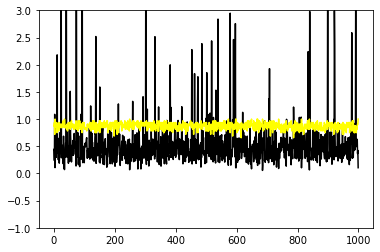

In [159]:
plt.ylim(-1,3)
plot(losses,color = 'black')
plot(accuracies,color = 'yellow')

In [160]:
# evaluation
Y_test_preds = torch.argmax(model(torch.tensor(X_test.reshape((-1, 28*28))).float()), dim=1).numpy()
(Y_test_preds == Y_test).mean()

0.8544